# Exploring the Risk Classification of Business Firms Based on Discrepancies in Past Audits

### **Introduction**

Audit is defined as the process of evaluating a business’ financial statements to ensure that these records concur with the expectations of standard accounting laws. The ability to detect fraudulent activity in a firm (i.e. a business) which may warrant an audit is essential to modern-day, efficient audit management. In this investigation, we will attempt to answer a **predictive** question with **classification** based on various audit risk factors such as: Given a firm’s amount of money involved in misstatements in past audits (“Money_Value” [Crore]) and total amount of discrepancies found in other reports (“TOTAL” [Crore]), can we accurately predict a firm’s appropriate Risk Class: “Fraud” or “No-fraud?” 

The “Audit Data” dataset will be used to answer this question. This dataset contains various predictors about 777 Indian firms over a one-year period from 2015 to 2016, cataloging past and present historical audit risk factors. A classification model can be built upon the two selected factors to predict and identify potentially fraudulent firms.

To expand upon our selected predictors: the variable “TOTAL” represents the total amount of discrepancies found in other reports (i.e. the sum of “PARA_A” and “PARA_B” scores, which are discrepancies in planned and unplanned expenditures, respectively). The variable “Money_Value” represents the amount of money involved in misstatements of past audits. Both of these indicators deal with firms’ past mismanaged or missing money and, as such, we feel they make excellent predictors for the classification of Risk Class. Risk Class is a binary categorical variable where the “Fraud” class is represented by “Risk = 1” and the “No-fraud” class is represented by “Risk = 0.” In context, firms that fall within the “Fraud” class are considered to warrant significant investigation. If a future firm were to be examined, by looking at their past audits and discrepancies through the model proposed herein, we can classify it as a potential “Fraud” or “No-Fraud” Risk. 


### **Methods and Results**

The K-nearest neighbours classification algorithm was used to predict the Risk Class category of the firm.

**Preparation**

We began the analysis by loading the packages we needed. Setting a seed value to produce a sequence of random numbers in a reproducible manner. We call set.seed and pass 1001 as an argument. After loading the original data “audit_data”, the risk classification is reset as a factor, with Risk = 1 meaning "Fraud" and Risk = 0 meaning "No Fraud". By comparing the number of firms, the risk classification of "Fraud" is vastly over-represented in the original data. 

**Selecting predictors**

In order to choose proper predictors based on the original dataset, we made a scatter plot visualization with various interested predictors coloured by Risk. Figure 1 shows the two final picked predictors, "Money_Value" (Money Value in Misstatements in Prior Audits [Indian Crore]) on the x-axis and "TOTAL" (Total Value of Discrepancies Found [Indian Crore]) on the y-axis. The "Fraud" firms in green occupy the upper and right corner of the graph. The "No Fraud" firms in orange are occupying the lower-left corner. 

**Clean data**

Afterward, we cleaned the original dataset by selecting the columns Money_Value, Total, and Risk for creating the model. Due to the "Fraud" data being over-represented, a recipe was created to oversample the "No Fraud" classification to balance the number of both kinds of firms in the dataset and increase the accuracy of the model. 

**Create the train/test split**

Before creating a model, the dataset is split into training and testing sets. The training dataset will train a model specification, and the testing dataset will be used only to test our model's accuracy. We use 80% of the data for training “audit_train”, and 20% for testing “audit_test”. This split ratio was chosen as an 80/20 split has been effective when dealing with fairly large data sets (Omony, J., 2021).

**Preprocess the data**

A standardization preprocessor is created using only the training data. We prepared the recipe and standardizes the two predictors because the K-nearest neighbors are sensitive to the scale when calculating the straight-line distance.

**Tuning the classifier**

The model was then specified by adjusting for the number of neighbours based on the accuracy estimate. In order to choose the best value of K, we compared the performance of the classifier with values between K = 1 and K = 50 for 5-fold cross-validation of the training set. To test K > 50 is not desirable because it takes a long time to run the code without a significant increase in accuracy. Afterward, we created our data analysis workflow and filtered out the accuracy. 

By plotting the accuracy versus K, Figure 2 shows that the accuracy reaches the highest value when K = 43. However, the K value which provides the highest accuracy is not always the best choice. To reduce the computational cost of training, a smaller value of K with a roughly optimal accuracy is preferred. Also, the values to nearby K values do not decrease accuracy too much. Therefore, K= 17 is selected. 

**Train the classifier**

A model specification was created with K = 17. Combined the model specification and recipe into the workflow, and then used fit with training dataset to build the K-nearest neighbors classifier with only the training set. 

**Predict the labels in the test set**

We used the k-nearest neighbours classifier object to predict the Risk classification. We also add the prediction column “.pred_class” to the original testing set. 

**Compute the accuracy**

Now we can get the quality of our model. We firstly use the metrics function and then create a confusion matrix for the classifier. The “.estimate” variable shows that the estimated accuracy of the classifier on the test data is about 90.72%. Also, the confusion matrix shows that the classifier predicts 176 (89+97) out of 194 observations correctly. 


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

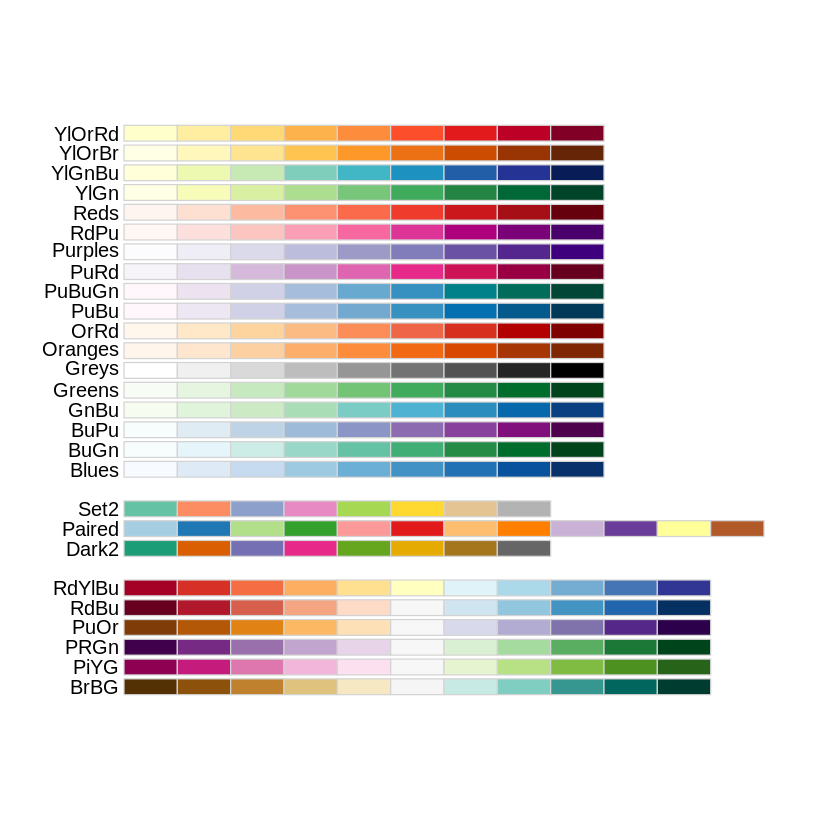

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(scales)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)
# Ensure the Palette used is colour blind friendly
display.brewer.all(colorblindFriendly = TRUE)

In [39]:
# Set seed to ensure randomness
set.seed(1001)

# Loading the Dataset
url = "https://raw.githubusercontent.com/fulleraltamiranoe/audit_data/main/trial.csv"
audit_trial_data <- read_csv(url) 

# Changing the Risk Classification to meaningful names
audit_trial_data$Risk <- ifelse(audit_trial_data$Risk == "1", "Fraud", "No Fraud")

# Treat Risk as factor
audit_trial_data <- audit_trial_data %>%
    mutate(Risk = as_factor(Risk))

# Visualizing original data utilizing a log scale
options(repr.plot.width = 12, repr.plot.height = 8) 
audit_original_plot <- audit_trial_data %>%
    ggplot(aes(x = Money_Value, y = TOTAL, colour = Risk)) +
    geom_point() +
    labs(x = "Money Value in Misstatements in Prior Audits [Indian Crore]", 
         y = "Total Value of Discrepancies Found [Indian Crore]", 
         colour = "Risk Classification") +
    ggtitle("Figure 1: The Effect on the Misstatement Value in Prior Audits and \nTotal Discrepancies on the Risk Classification") +
    theme(text = element_text(size = 12), plot.title = element_text(hjust = 0.5)) +
    scale_x_log10(labels = label_comma()) +
    scale_y_log10(labels = label_comma()) +
    scale_color_brewer(palette = "Set2")

Parsed with column specification:
cols(
  Sector_score = col_double(),
  LOCATION_ID = col_character(),
  PARA_A = col_double(),
  SCORE_A = col_double(),
  PARA_B = col_double(),
  SCORE_B = col_double(),
  TOTAL = col_double(),
  numbers = col_double(),
  Marks = col_double(),
  Money_Value = col_double(),
  MONEY_Marks = col_double(),
  District = col_double(),
  Loss = col_double(),
  LOSS_SCORE = col_double(),
  History = col_double(),
  History_score = col_double(),
  Score = col_double(),
  Risk = col_double()
)



Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


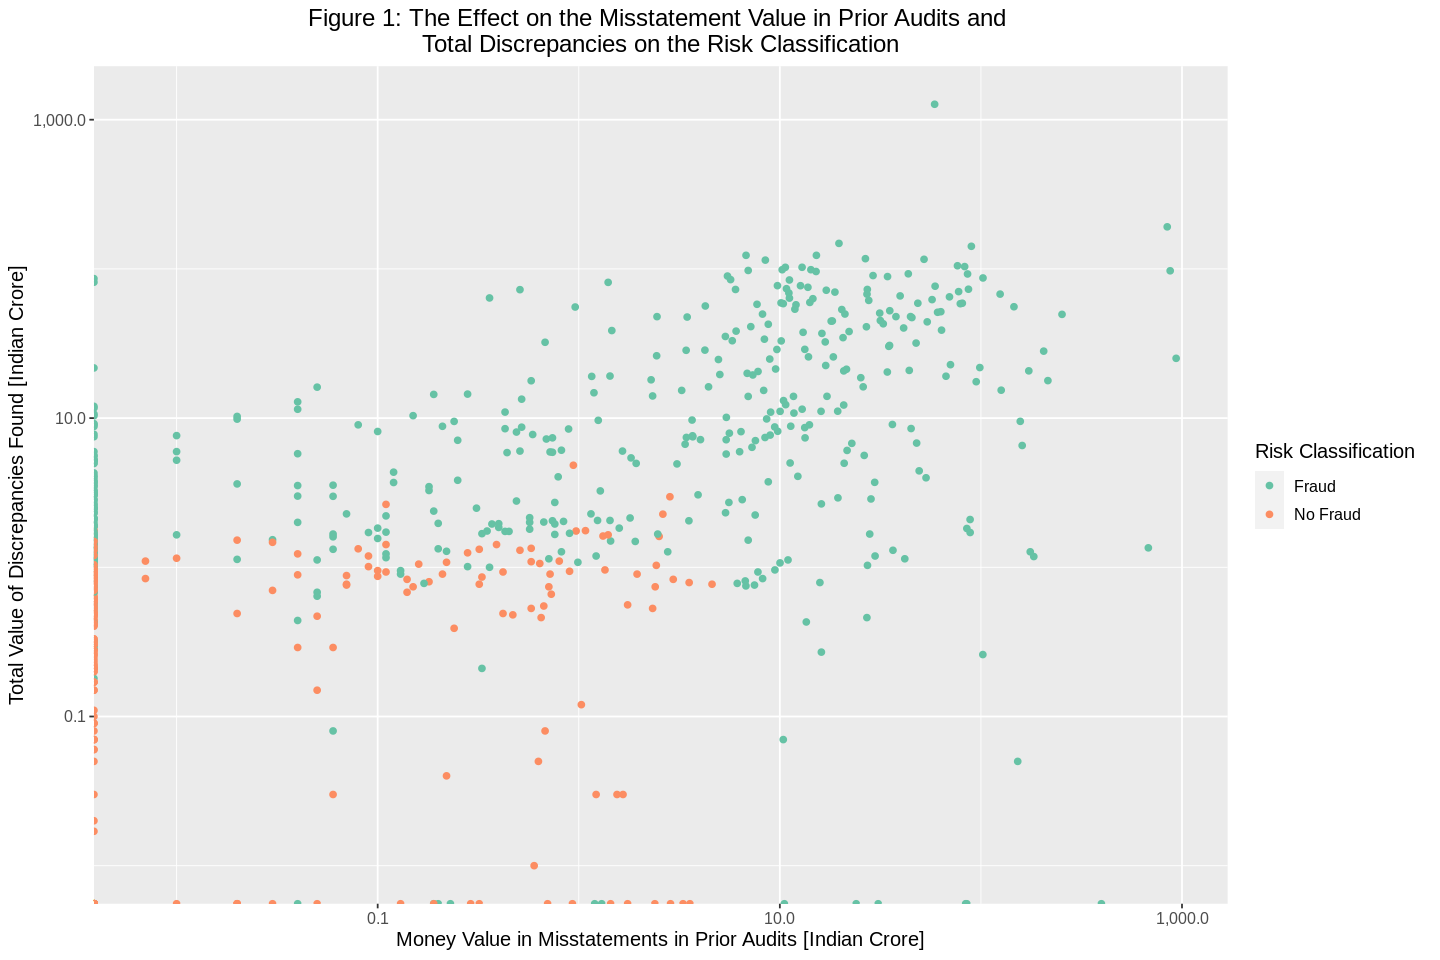

In [40]:
audit_original_plot

In [28]:
# Cleaning the dataset and keeping predictors we will use
# From the above visualization, we can see that most firms
# are considered Fraud, we will balance the data set
audit <- audit_trial_data %>%
    select(Money_Value, TOTAL, Risk) 

# Group by Risk and Summarize to see how the Risk classification is ditributed
count <- audit %>%
    group_by(Risk) %>%
    summarize(count = n(), percentage = n() / nrow(audit_trial_data) * 100)

# Fraud data is over represented. Balancing original data
audit_recipe_balance <- recipe(Risk ~ TOTAL + Money_Value, data = audit) %>%
    step_upsample(Risk, over_ratio = 1, skip = FALSE) %>%
    prep()

# Balanced data
upsampled_audit <- bake(audit_recipe_balance, audit)

upsampled_count <- upsampled_audit %>%
    group_by(Risk) %>%
    summarize(count = n(), percentage = n() / nrow(audit_trial_data) * 100)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



**Table 1:**

In [29]:
audit

Money_Value,TOTAL,Risk
<dbl>,<dbl>,<fct>
3.38,6.68,Fraud
0.94,4.83,No Fraud
0.00,0.74,No Fraud
⋮,⋮,⋮
0.00,0.28,No Fraud
0.00,0.20,No Fraud
0.32,0.00,No Fraud


**Table 2:**

In [30]:
count

Risk,count,percentage
<fct>,<int>,<dbl>
Fraud,486,62.62887
No Fraud,290,37.37113


**Table 3:**

In [31]:
upsampled_count

Risk,count,percentage
<fct>,<int>,<dbl>
Fraud,486,62.62887
No Fraud,486,62.62887


In [32]:
# Splitting data into training and testing sets, 80% training data to ensure as much accuracy in 
# our model as possible.
audit_split <- initial_split(upsampled_audit, prop = 0.8, strata = Risk)  
audit_train <- training(audit_split)   
audit_test <- testing(audit_split)

# Training with our predictors
audit_recipe <- recipe(Risk ~ TOTAL + Money_Value, data = audit_train) %>%
    step_scale(all_predictors())%>%
    step_center(all_predictors())

# tuning, determine how many neighbours to use
knn_tune <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) %>%
    set_engine('kknn') %>%
    set_mode('classification')

audit_vfold <- vfold_cv(audit_train, v = 5, strata = Risk)

# Multiple maximum values of K were tested, after 50 running the code takes too long and 
# there's no significant increase in accuracy
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

knn_results <- workflow() %>%
    add_recipe(audit_recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = audit_vfold, grid = k_vals) %>%
    collect_metrics()

accuracies <- knn_results %>% 
    filter(.metric == 'accuracy')

# Visualizing the accuracy of each value of K to choose the best possible one
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbours", y = "Accuracy Estimate") + 
    ggtitle("Figure 2: Accuracy Estimate of Different Values of K") +
    theme(text = element_text(size = 12), plot.title = element_text(hjust = 0.5)) +
    scale_x_continuous(limits = c(1, 50), breaks = seq(0, 50, by = 1)) +  # adjusting the x-axis
    scale_y_continuous(limits = c(0.7, 0.9), breaks = seq(0, 1, by = 0.01)) # adjusting the y-axis

x Fold1: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold2: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...



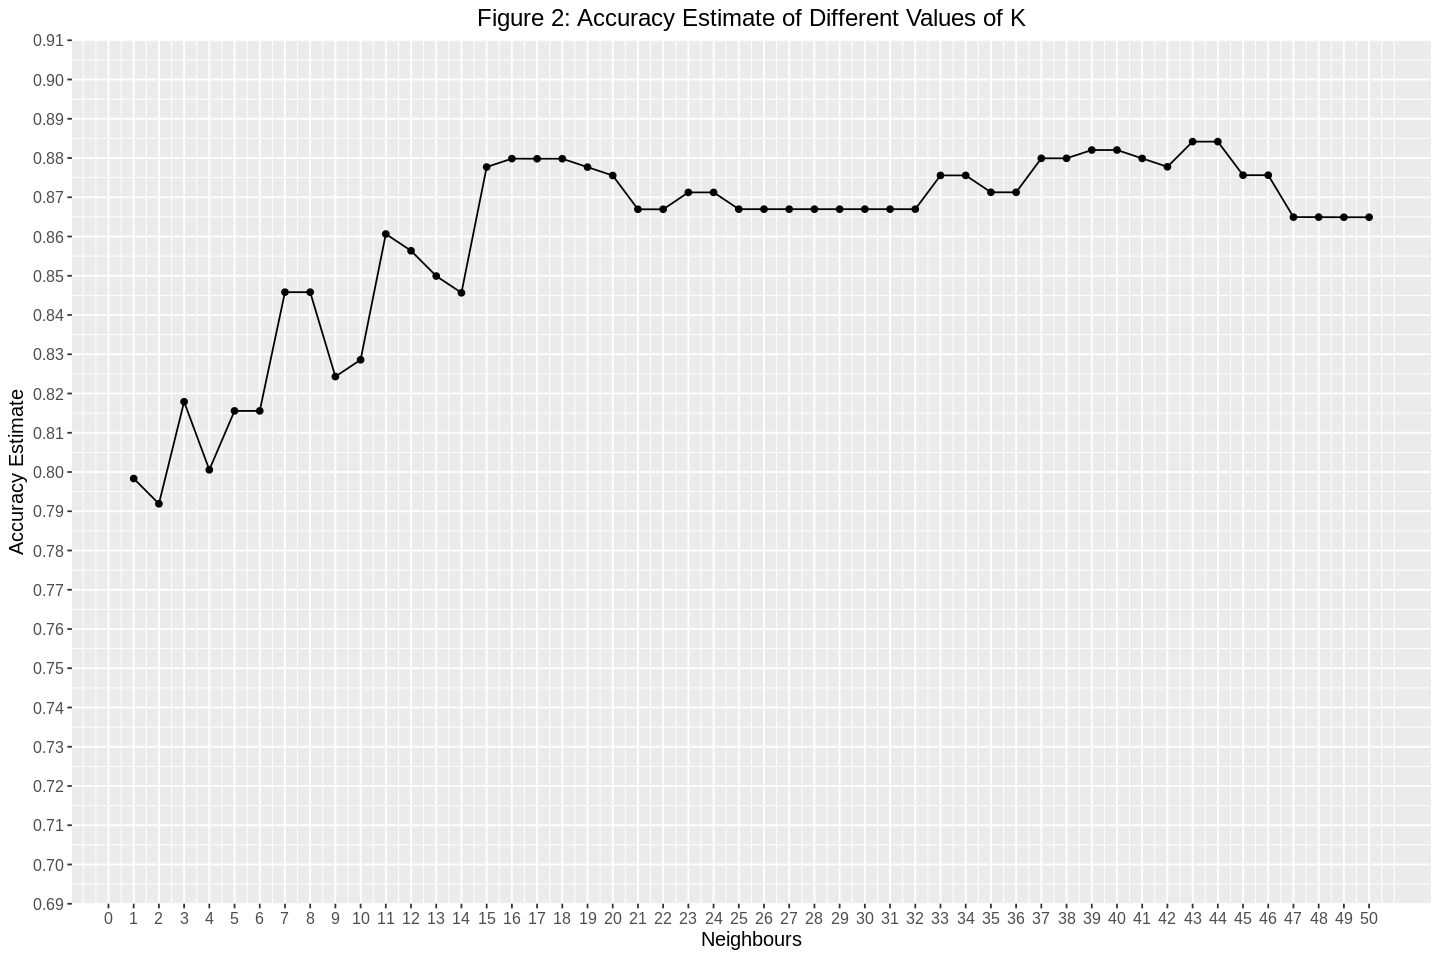

In [33]:
accuracy_versus_k

In [34]:
# K = 17 seems to be the most accurate (K values around 17 do not differ much in contrast to K = 43) 
# Re-train with this value of K
audit_knn_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = 17) %>%
    set_engine('kknn') %>%
    set_mode('classification')

# Fitting our data
audit_fit <- workflow() %>%
    add_recipe(audit_recipe) %>%
    add_model(audit_knn_spec) %>%
    fit(data = audit_train)

# Testing the accuracy of our model with our testing data 
audit_test_predictions <- predict(audit_fit, audit_test) %>%
    bind_cols(audit_test)

predictions_accuracy <- audit_test_predictions %>%
    metrics(truth = Risk, estimate = .pred_class)             

# Creating a confusion matrix
audit_mat <- audit_test_predictions %>% 
    conf_mat(truth = Risk, estimate = .pred_class)   

**Table 4:**

In [35]:
predictions_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9072165
kap,binary,0.8144330


**Table 5:**

In [36]:
audit_mat

          Truth
Prediction Fraud No Fraud
  Fraud       89       10
  No Fraud     8       87

In [41]:
# Visualizing our model with two brand new supicious firms
suspicious_firms <- tibble(Name = c('Suspicious Firm 1 (F1)', 'Suspicious Firm 2 (F2)'), Money_Value = c(1, 0.1), TOTAL = c(1.3, 1.2)) 

new_firms <- audit_original_plot + 
    ggtitle("Figure 3: Prediction of Risk Classification of two Theoritical Firms") +
    geom_point(aes(x = 1, y = 1.3), color = "black", size = 3) +
    geom_point(aes(x = 0.1, y = 1.2), color = "black", size = 3) +
    annotate("text", x = 1, y = 0.6, label = "F1", size = 6) +
    annotate("text", x = 0.1, y = 0.6, label = "F2", size = 6) 

In [42]:
# Testing our model with these two new firms
suspicious_prediction <- predict(audit_fit, suspicious_firms) %>%
    bind_cols(suspicious_firms)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


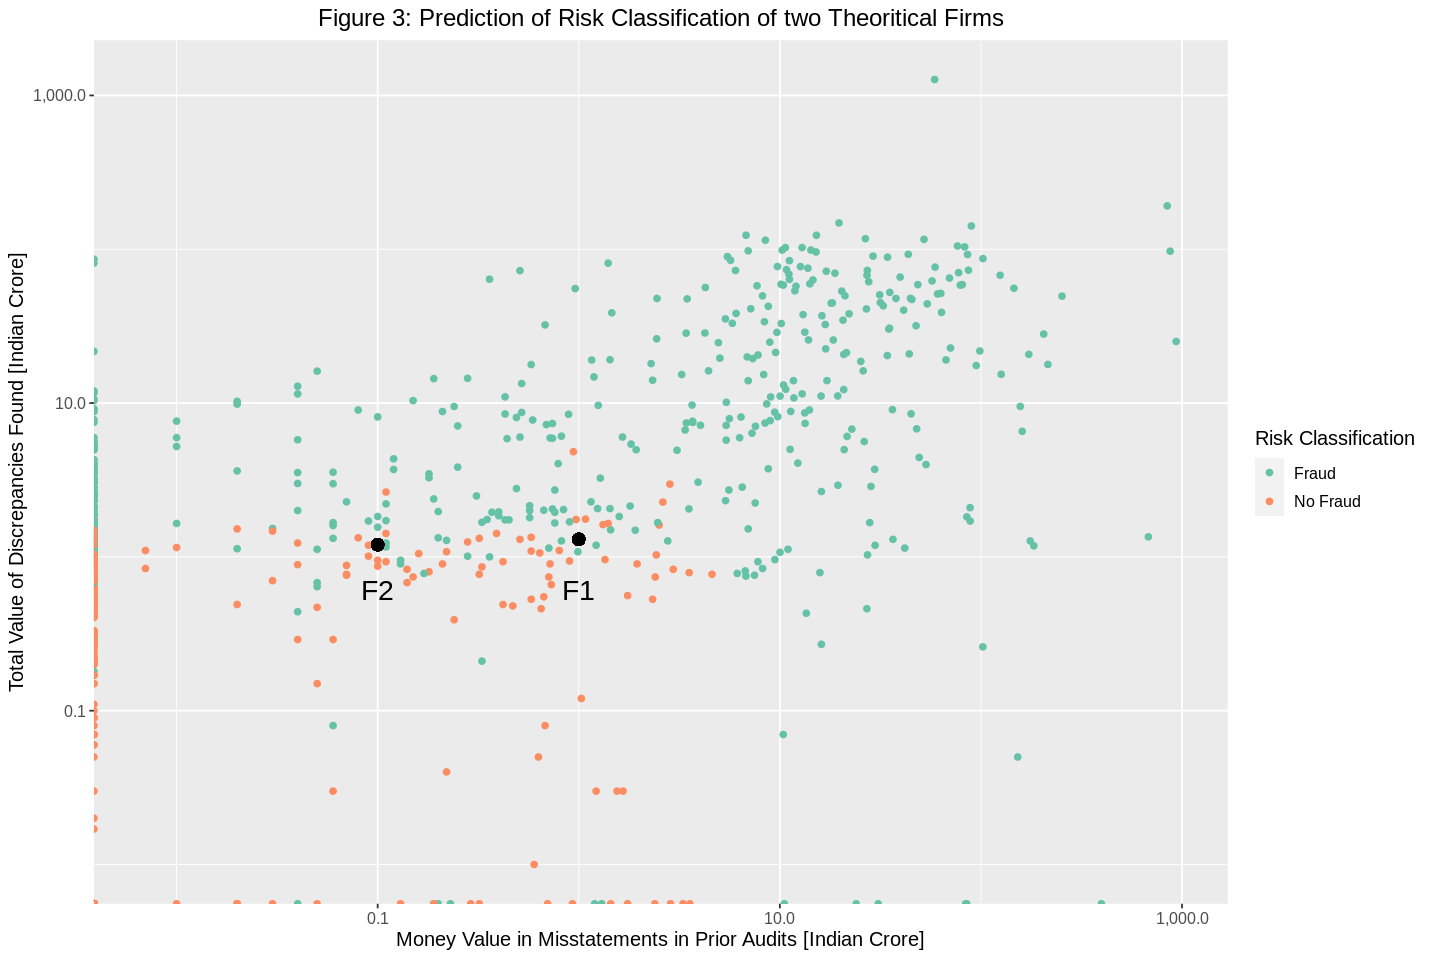

In [43]:
new_firms

**Table 5:**

In [44]:
suspicious_prediction

.pred_class,Name,Money_Value,TOTAL
<fct>,<chr>,<dbl>,<dbl>
No Fraud,Suspicious Firm 1 (F1),1.0,1.3
Fraud,Suspicious Firm 2 (F2),0.1,1.2


### **Discussion**

The K-nearest neighbors model we arrived at returned an accuracy of 90.72%. For our purposes, we were happy with this level of accuracy and decided to accept the model. Aided by the “accuracy vs. K” plot, we decided to employ K = 17 neighbors. Accuracy reaches a relative maximum at this point, and although it continues to increase slightly beyond this point, it is by a diminishing amount. The accuracy at K = 43, for example, is slightly greater than that at K = 17, but taking into account realistic computational limits, including time and resources, we decided that the accuracy at K = 17 was sufficient for our purposes. In addition, we noted that the K values near our choice, K = 17 neighbors, were relatively more stable (lacked drastic change) than those surrounding the K = 43 value. 

Further, we employed an 80%:20% split of training to testing data in our model. When deciding on our train–test split, we expected the trade-off between training an accurate model (by using a larger training data set) and getting an accurate evaluation of its performance (by using a larger test data set). We decided to value the accuracy of the model slighting higher and so we felt using 80% training data would ensure as much accuracy in our model as possible.

In our initial exploratory data analysis, we found a class imbalance in our data set. A class imbalance occurs when one label is much more common than another; this can become a potential issue for the classifier and is one weakness of a K-nearest neighbors classification approach. Specifically, we found firms within the fraud risk class to be overrepresented in the data. To preface, we decided to use a logarithmic scale for our predictors in order to make our visualizations more clear and readable. To solve the issue of class imbalance, we experimented with i) cutting off the higher values of our log scale, which were overrepresented by the fraud class, and ii) oversampling the rare class. Both methods proved to be useful in settling the class imbalance. However, when using the cut-off method, we arrived at an accuracy of about 85.59%. When using the oversampling method, we arrived at the accuracy specified previously of 90.72%. Therefore, we felt the latter method was more appropriate and effective for our data set.

To further illustrate the utility of our model, we created two fictitious firms, named “Suspicious Firm 1 (F1)” and “Suspicious Firm 2 (F2).” Both firms were intentionally placed in a more ambiguous zone of our sample, i.e. it wasn’t immediately obvious, given visual and numerical information, which risk class these firms would fall into. Here, we relied on our model to make an educated guess at the risk class of these suspicious firms; the model returned only F2 as a potentially fraudulent firm. This is a case study in what might occur between a classifier and authorities, alerting the latter to potential fraud when utilizing our model.

In general, all these results aligned with our group’s expectations. Based on our chosen predictors, which indicate firms’ past mismanagement and discrepancies, we feel these results reflected our initial confidence in these variables. In this way, we can conclude that, given a firm’s amount of money involved in past misstatements and the total amount of discrepancies found in other reports, we can predict a firm’s appropriate risk class with about 91% accuracy. 

Looking forward, this classification will help suggest which firms should be inspected more closely by the financial authorities of the future (as we attempted to illustrate rudimentarily with F1 and F2). The future direction of this data set would be to confirm the Risk classification, i.e. are the identified “Fraud” firms actually partaking in fraudulent activities? Creating accurate models such as this can improve the essential auditing practices of financial institutions all over the world. 


### **References**

Hooda, N., Bawa, S., & Rana, P. (2018), Fraudulent Firm Classification: A Case Study of an External Audit, Applied Artificial Intelligence, 32:1, 48-64, DOI: 10.1080/08839514.2018.1451032

Omony, J. (2021). Re: Is there an ideal ratio between a training set and validation set? Which trade-off would you suggest?. Retrieved from: https://www.researchgate.net/post/Is-there-an-ideal-ratio-between-a-training-set-and-validation-set-Which-trade-off-would-you-suggest/6014025501f07467982e4fad/citation/download. 